#### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [7]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

0

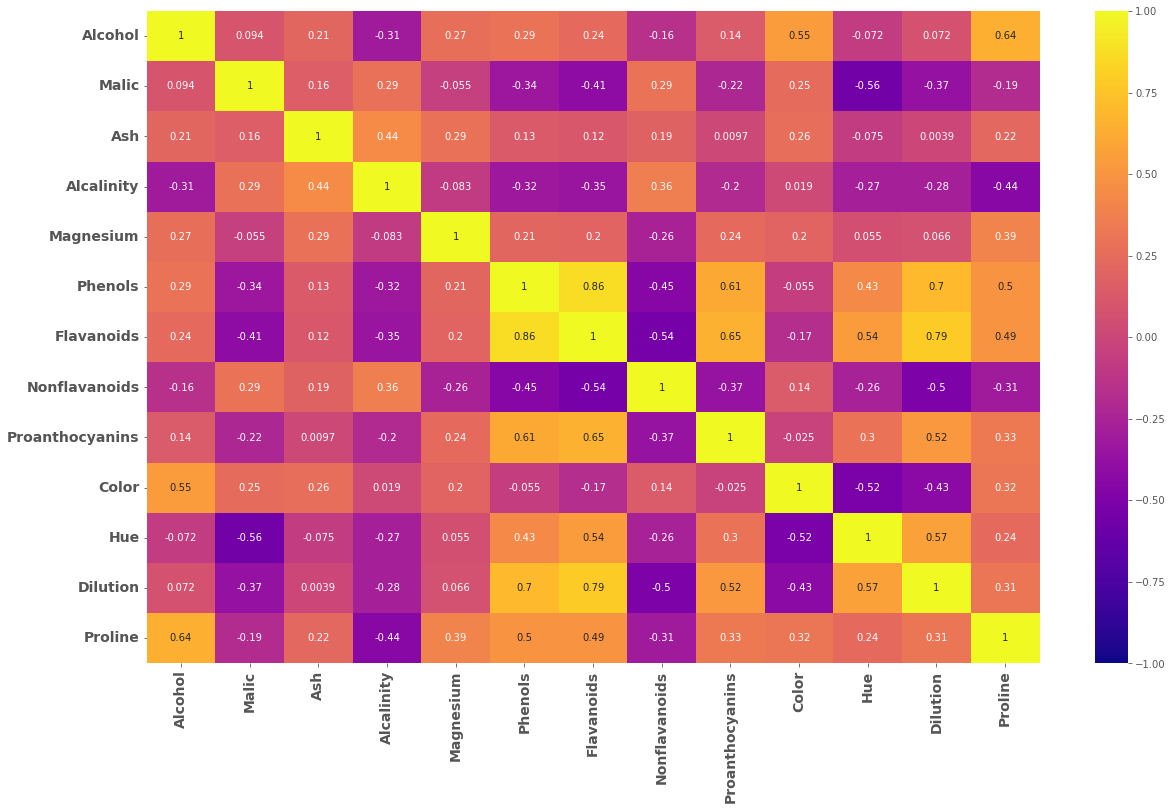

In [20]:
correlation = df.iloc[:,1:].corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,cmap='plasma',
           annot=True)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold');

<font color='magenta'><b>From the graph, Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins

<font color='magenta'><b>Flavanoids is positively correlated with Proanthocyanins and Dilution

<font color='magenta'><b>Dilution is positively correlated with Hue

<font color='magenta'><b>Alcohol is positively correlated with Proline

In [21]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

## <font color='maroon'><b>Principal Component Analysis :

In [25]:
from sklearn.decomposition import PCA

### <font color='green'><b>Feature Scaling :

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
df_std = scaler.fit_transform(df.drop('Type', axis=1))
df_std = pd.DataFrame(df_std, columns=df.columns[1:])
df_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### <font color='orange'><b>To find the Number of Components for PCA :

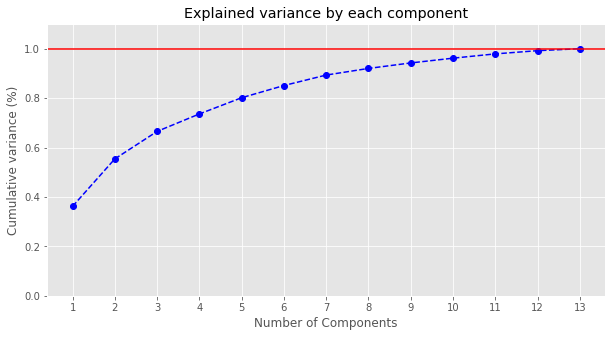

In [31]:
# PCA
pca_var = PCA()
pca_var.fit(df_std)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+df_std.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+df_std.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(True)

In [32]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

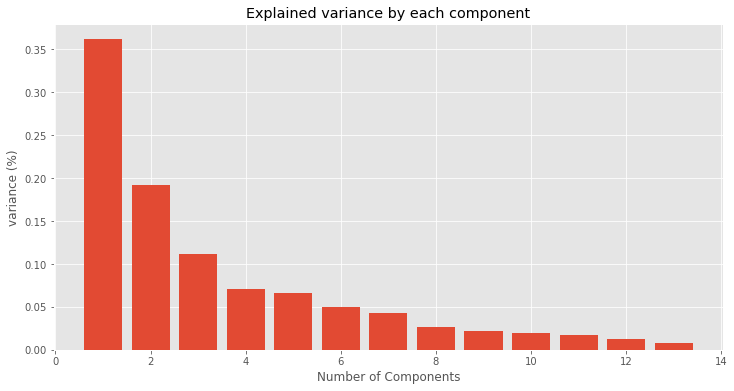

In [34]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component');

In [35]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

### <font color='orange'><b>PCA with n_components=3 as given :

In [59]:
pca = PCA(n_components=3)
pca_comp = pca.fit_transform(df_std)

# Convert to data frame
pca_df = pd.DataFrame(data = pca_comp, columns = ['PC1', 'PC2','PC3'])
pca_df.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


### <font color='cyan'><b> PCA plot in 2D :

In [40]:
for_visual = pd.concat([pca_df, df['Type']], axis = 1)
print(for_visual)

          PC1       PC2       PC3  Type
0    3.316751 -1.443463 -0.165739     1
1    2.209465  0.333393 -2.026457     1
2    2.516740 -1.031151  0.982819     1
3    3.757066 -2.756372 -0.176192     1
4    1.008908 -0.869831  2.026688     1
..        ...       ...       ...   ...
173 -3.370524 -2.216289 -0.342570     3
174 -2.601956 -1.757229  0.207581     3
175 -2.677839 -2.760899 -0.940942     3
176 -2.387017 -2.297347 -0.550696     3
177 -3.208758 -2.768920  1.013914     3

[178 rows x 4 columns]


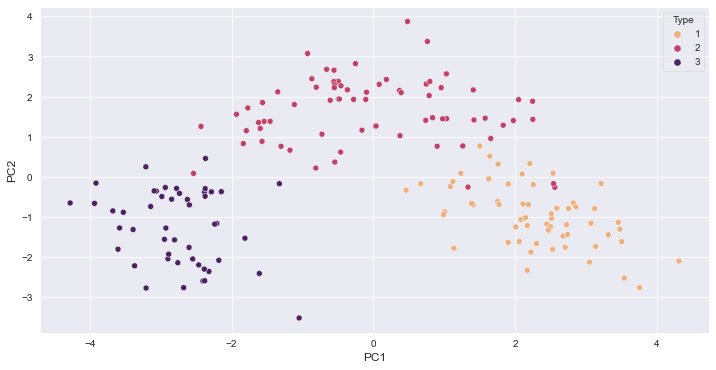

In [50]:
sns.set_style('darkgrid')
sns.scatterplot(data=for_visual,x='PC1',y='PC2',hue='Type',palette='flare');

### <font color='magenta'><b>Scree plot :

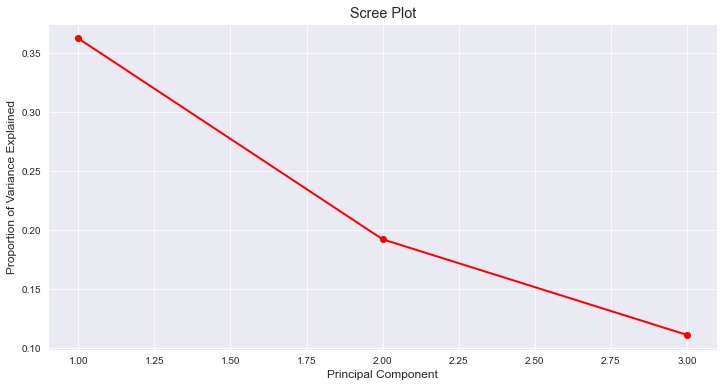

In [64]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<font color='peach'><b>Scree plot explains the proportion of variance of each Principal Component.

In [66]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


## <font color='purple'><b>Hierarchical Clustering :

### <font color='cyan'><b>To find the number of clusters :

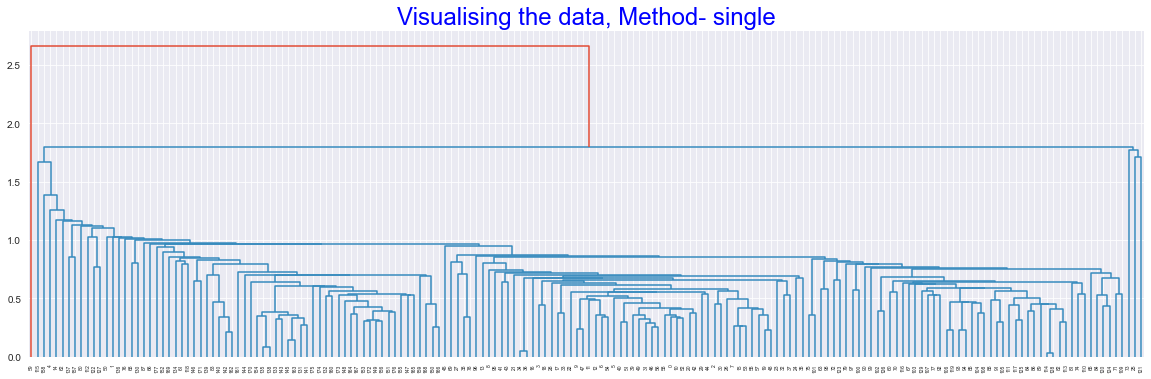

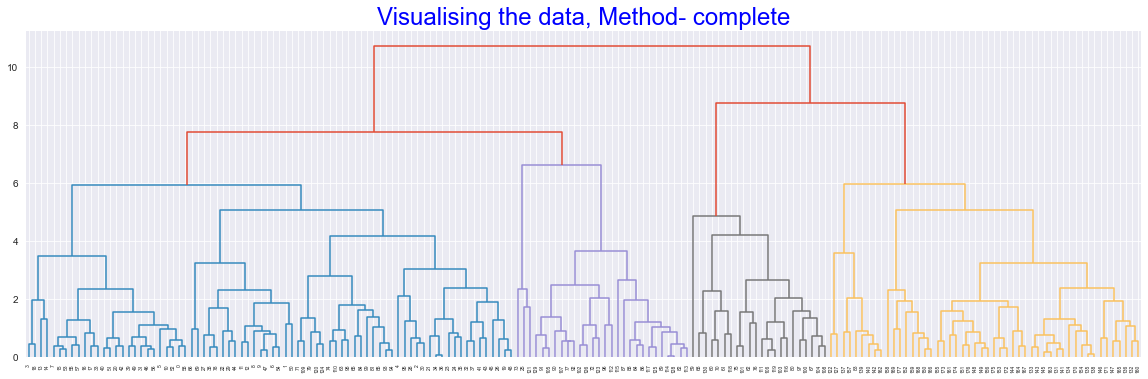

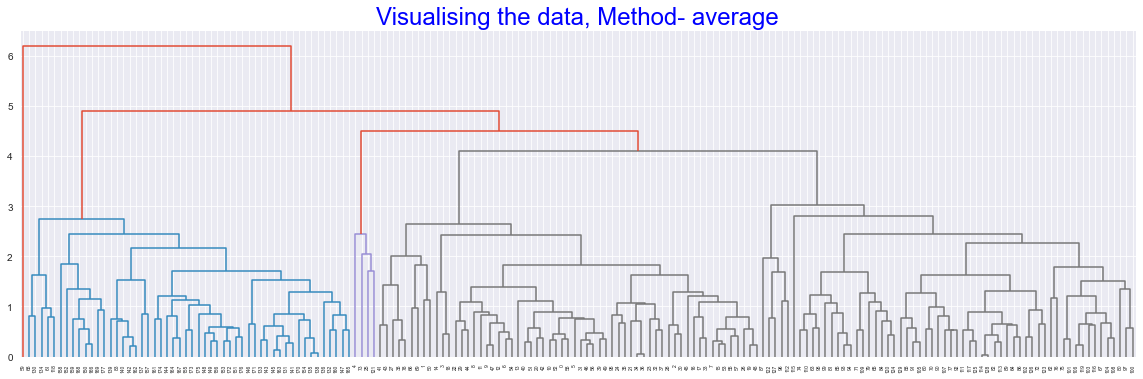

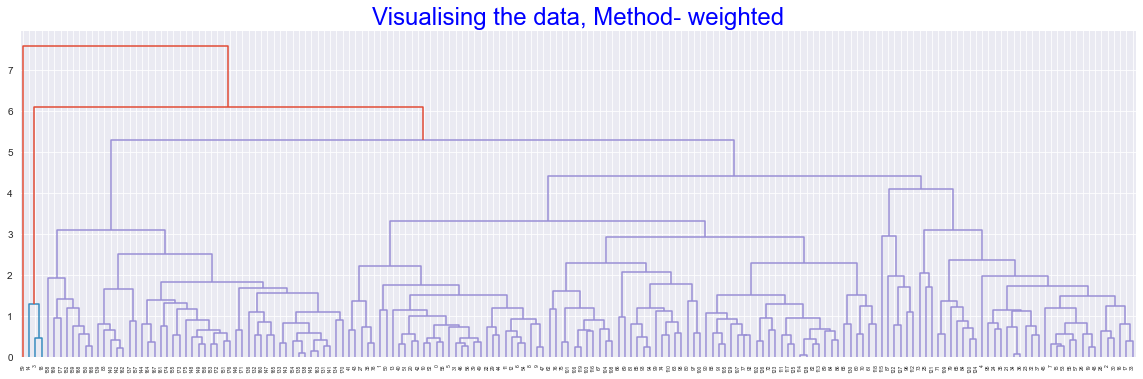

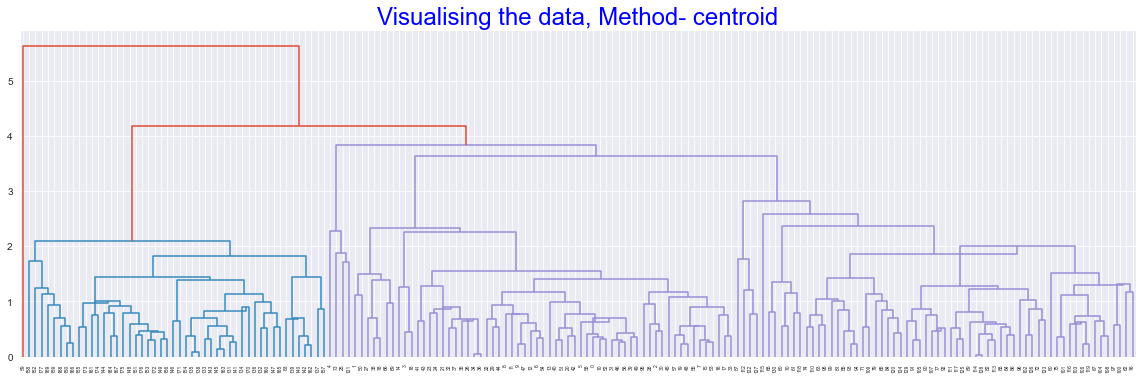

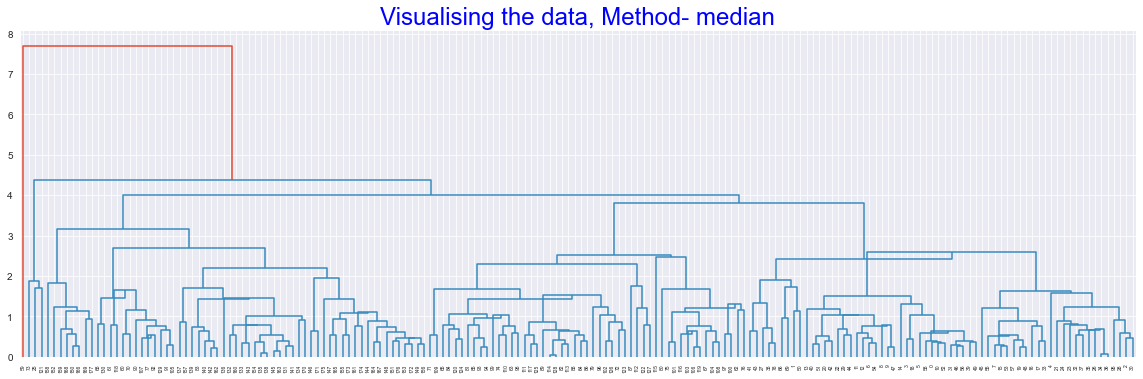

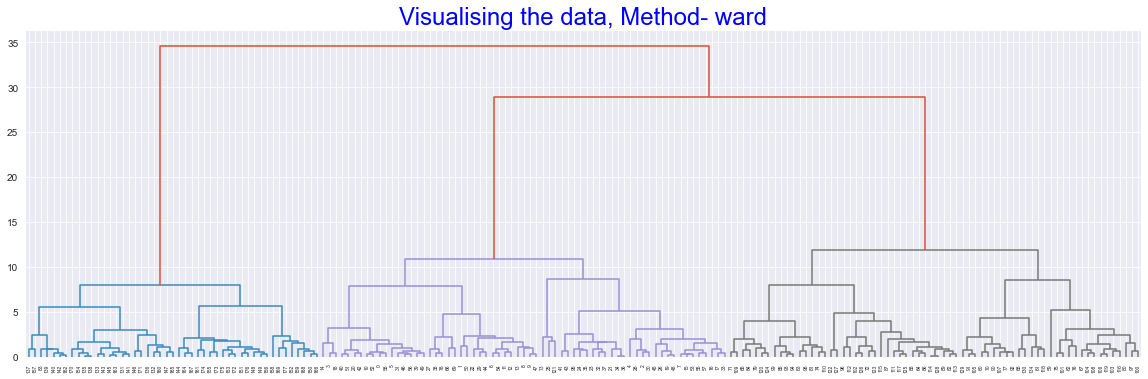

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_df, method = methods,optimal_ordering=False))

<font color='peach'><b>All these methods show 3 clusters, same as PCA. Ward method shows it more perfectly.

### <font color='orange'><b>Agglomerative Clustering with default method=ward and affinity=euclidean:

In [99]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)

In [100]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(pca_df)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [101]:
# add cluster labels to the dataset
df_h = pca_df.copy()
df_h['cluster_labels'] = labels
df_h.head()

,PC1,PC2,PC3,cluster_labels
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [102]:
df_h.groupby('cluster_labels').mean().round(2)

,PC1,PC2,PC3
cluster_labels,,,
0,-0.24,1.72,0.16
1,-2.78,-1.27,-0.14
2,2.26,-0.83,-0.07


In [103]:
df_h.cluster_labels.value_counts()

0    66
2    65
1    47
Name: cluster_labels, dtype: int64

In [104]:
from sklearn.metrics import silhouette_score as sil

In [108]:
print('Silhouette Score is', sil(pca_df,labels))

Silhouette Score is 0.44594921980629704


### <font color='cyan'><b>Check Silhouette Score for other methods and distance metrics :

In [111]:
n_clusters = [2,3]  
for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) 
            hie_labels = hie_cluster.fit_predict(pca_df)
            silhouette_score1 = sil(pca_df, hie_labels)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.33263007508998715

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.3

<font color='peach'><b>So n_clusters=3, method= ward and affinity=euclidean has given the best silhouette score of 0.4459.

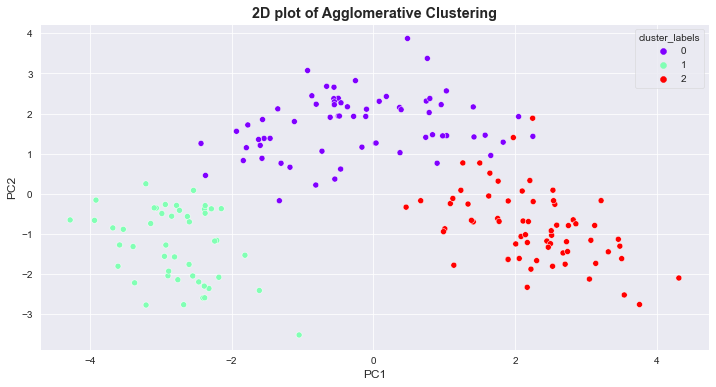

In [114]:
sns.scatterplot(data=df_h, x='PC1', y ='PC2', hue='cluster_labels',palette='rainbow')
plt.title('2D plot of Agglomerative Clustering',fontweight='bold');

## <font color='purple'><b>K-Means Clustering :

In [115]:
from sklearn.cluster import KMeans

### <font color='cyan'><b>Elbow method :

In [116]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_std)
    wss.append(kmeans.inertia_)

In [117]:
wss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1104.8616839625317,
 1042.3872037251417,
 988.0533283180055,
 940.708165089653,
 902.0783170433883,
 866.7991687164845]

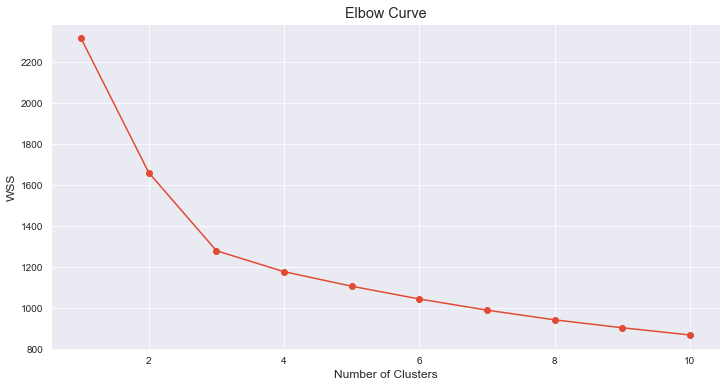

In [118]:
plt.plot(range(1,11), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

### <font color='cyan'><b>Silhouette Score method :

In [120]:
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_std)
    ss.append(silhouette_score(df_std, km.labels_))

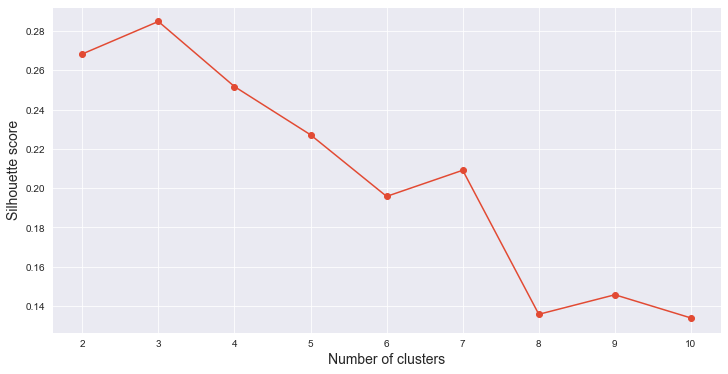

In [123]:
plt.plot(range(2,11), ss, marker='o')
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14);

<font color='peach'><b>Silhoutte Score is highest when number of clusters is 3.

### <font color='cyan'><b>K-Means Clustering with k=3 :

In [124]:
km2 = KMeans(n_clusters=3, random_state=42)
km2.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [125]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [126]:
df_k = pca_df.copy()
df_k['k_cluster_labels'] = labels
df_k.head()

,PC1,PC2,PC3,k_cluster_labels
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [127]:
df_k.k_cluster_labels.value_counts()

2    65
1    62
0    51
Name: k_cluster_labels, dtype: int64

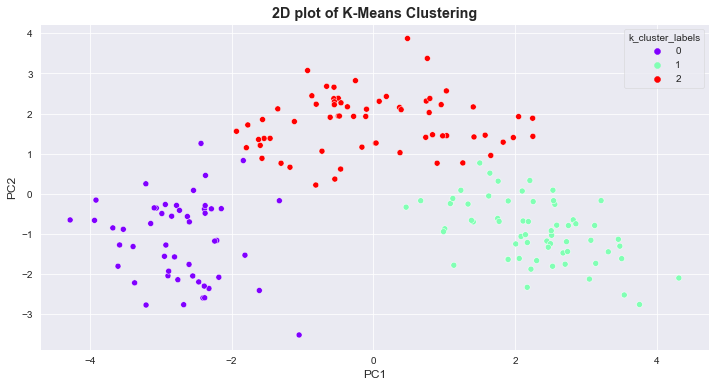

In [131]:
sns.scatterplot(data=df_k, x='PC1', y ='PC2', hue='k_cluster_labels',palette='rainbow')
plt.title('2D plot of K-Means Clustering',fontweight='bold');

<font color='peach'><b>So we have obtained the same number of clusters in both agglomerative and kmeans clustering as the original data.